# Explore here

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


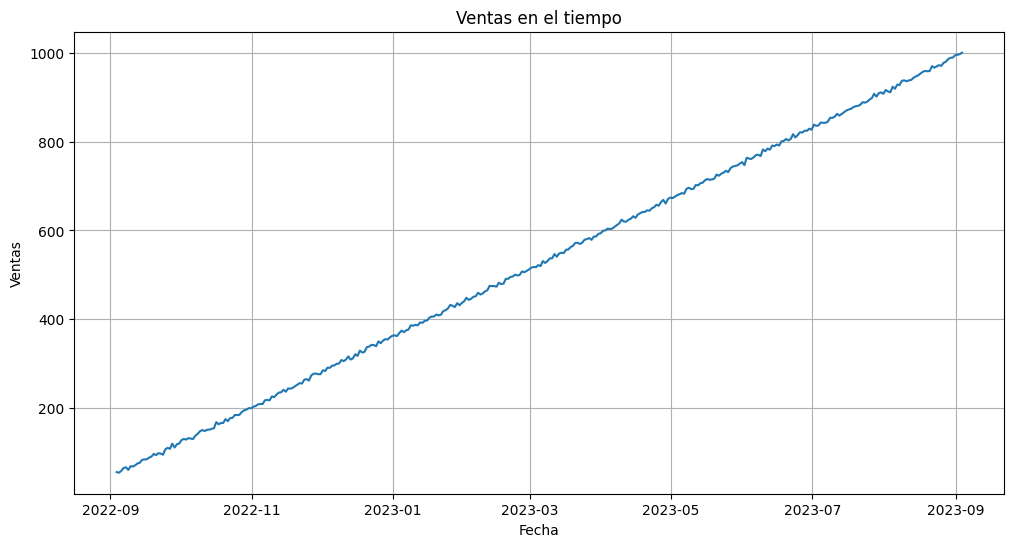


--- Análisis ---
TENSOR (unidad mínima de tiempo): D


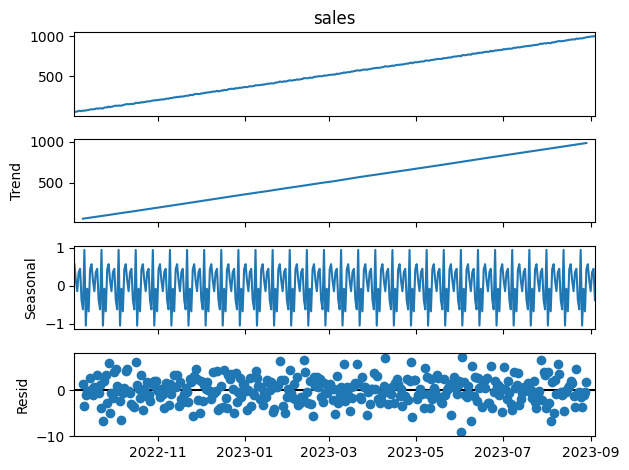

ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063
⚠️ La serie NO es estacionaria.


/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  354
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1019.075
Date:                Sat, 26 Apr 2025   AIC                           2044.151
Time:                        21:21:18   BIC                           2055.750
Sample:                    09-03-2022   HQIC                          2048.766
                         - 08-22-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    975.613      0.000       0.998       1.002
ma.L1         -0.9995      0.784     -1.275      0.202      -2.536       0.537
sigma2        18.5919     14.677      1.267      0.2

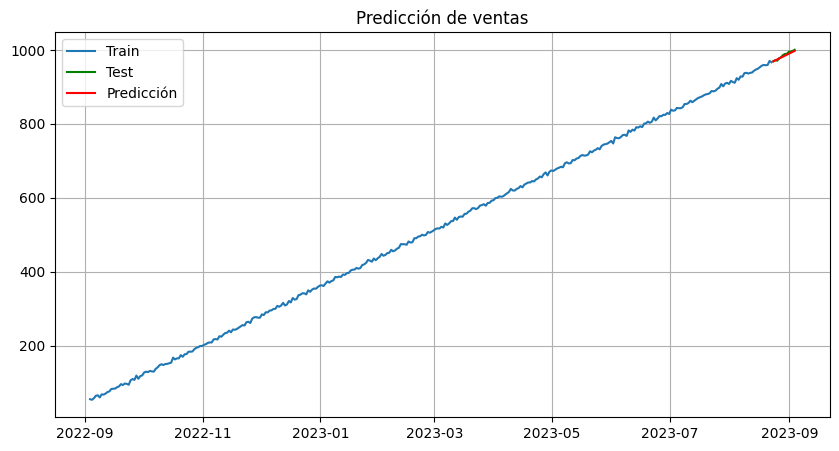

Mean Squared Error: 9.26
✅ Modelo guardado en 'sales_forecast_arima.pkl'


In [3]:
# Your code here
# Paso 1: Carga del conjunto de datos
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import joblib

# Cargar el dataset
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
df = pd.read_csv(url)
print(df.head())

# Convertir a formato de serie temporal
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df['sales'])
plt.title('Ventas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid()
plt.show()

# Paso 2: Análisis de la serie temporal
print("\n--- Análisis ---")
print(f"TENSOR (unidad mínima de tiempo): {pd.infer_freq(df.index)}")  # frecuencia
# Puede devolver 'MS' (Month Start), 'D' (Diario), etc.

# Tendencia
decomposition = sm.tsa.seasonal_decompose(df['sales'], model='additive', period=12)
decomposition.plot()
plt.show()

# Estacionariedad: Prueba de Dickey-Fuller aumentada
adf_test = adfuller(df['sales'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
if adf_test[1] < 0.05:
    print('✅ La serie ES estacionaria.')
else:
    print('⚠️ La serie NO es estacionaria.')

# Paso 3: Entrenar un ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Separar en train-test
train = df.iloc[:-12]  # Dejamos los últimos 12 meses para test
test = df.iloc[-12:]

# Parametrización simple (p,d,q) = (1,1,1) — después puedes ajustar mejor
model = ARIMA(train['sales'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Paso 4: Predicción y evaluación
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10,5))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test', color='green')
plt.plot(test.index, forecast, label='Predicción', color='red')
plt.legend()
plt.title('Predicción de ventas')
plt.grid()
plt.show()

# Métrica: Error cuadrático medio
mse = mean_squared_error(test['sales'], forecast)
print(f"Mean Squared Error: {mse:.2f}")

# Paso 5: Guardar el modelo
joblib.dump(model_fit, 'sales_forecast_arima.pkl')
print("✅ Modelo guardado en 'sales_forecast_arima.pkl'")
